In [1]:
"""
What is an ROC Curve?
ROC stands for Receiver Operating Characteristic.

It's a graph that shows how well your classification model (like "spam vs. not spam") performs at different thresholds.

X-axis: False Positive Rate (FPR)

"How many bad things did I accidentally let in?"

Formula: FPR = False Positives / (False Positives + True Negatives)

Y-axis: True Positive Rate (TPR)

"How many good things did I actually catch?"

Formula: TPR = True Positives / (True Positives + False Negatives)

What is AUC?
AUC stands for Area Under the ROC Curve.

It measures how good your model is at distinguishing between classes (e.g., "up" vs. "down").

AUC = 1: Perfect model (never wrong).

AUC = 0.5: Useless model (like guessing randomly).

AUC > 0.8: Good model!

Why do we need them?
Helps pick the best threshold for your model (e.g., when to say "YES, it's spam").

Shows if your model is better than random guessing.

Useful when mistakes have different costs (e.g., missing a disease is worse than a false alarm).

"""

'\nWhat is an ROC Curve?\nROC stands for Receiver Operating Characteristic.\n\nIt\'s a graph that shows how well your classification model (like "spam vs. not spam") performs at different thresholds.\n\nX-axis: False Positive Rate (FPR)\n\n"How many bad things did I accidentally let in?"\n\nFormula: FPR = False Positives / (False Positives + True Negatives)\n\nY-axis: True Positive Rate (TPR)\n\n"How many good things did I actually catch?"\n\nFormula: TPR = True Positives / (True Positives + False Negatives)\n\nWhat is AUC?\nAUC stands for Area Under the ROC Curve.\n\nIt measures how good your model is at distinguishing between classes (e.g., "up" vs. "down").\n\nAUC = 1: Perfect model (never wrong).\n\nAUC = 0.5: Useless model (like guessing randomly).\n\nAUC > 0.8: Good model!\n\nWhy do we need them?\nHelps pick the best threshold for your model (e.g., when to say "YES, it\'s spam").\n\nShows if your model is better than random guessing.\n\nUseful when mistakes have different costs (

In [2]:
"""
Python Example with Time Series Data
Scenario: Predict if tomorrow's stock price will be UP (1) or DOWN (0) based on past prices.

Step 1: Create Fake Stock Data
"""

"\nPython Example with Time Series Data\nScenario: Predict if tomorrow's stock price will be UP (1) or DOWN (0) based on past prices.\n\nStep 1: Create Fake Stock Data\n"

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Generate fake stock prices (time series)
np.random.seed(42)
dates = pd.date_range(start="2023-01-01", periods=100, freq="D")
prices = np.cumsum(np.random.randn(100))  # Random walk
df = pd.DataFrame({"Date": dates, "Price": prices})

# Create target: 1 if price goes up tomorrow, else 0
df["Target"] = np.where(df["Price"].shift(-1) > df["Price"], 1, 0)

# Create lag features (past prices)
df["Lag1"] = df["Price"].shift(1)  # Yesterday's price
df["Lag2"] = df["Price"].shift(2)  # Price 2 days ago
df = df.dropna()

# Split into train/test (time-based!)
train = df[df["Date"] < "2023-03-01"]
test = df[df["Date"] >= "2023-03-01"]

In [4]:
#Step 2: Train a Model
X_train = train[["Lag1", "Lag2"]]
y_train = train["Target"]
X_test = test[["Lag1", "Lag2"]]
y_test = test["Target"]

model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities (not just 0/1)
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Prob of class "1" (UP)

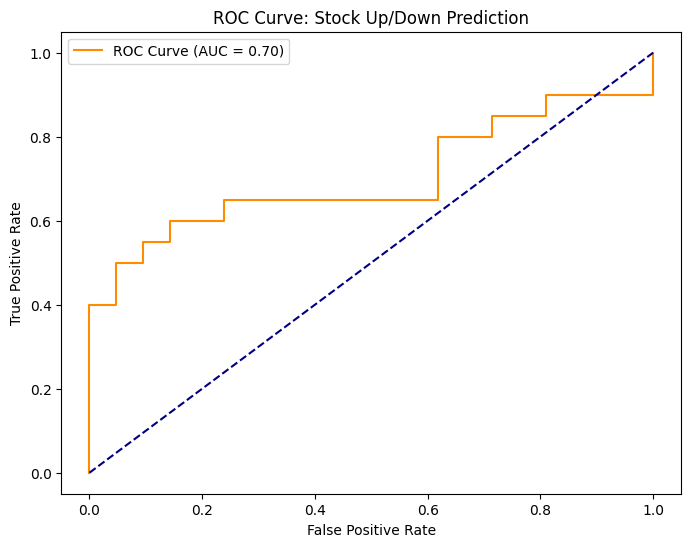

In [5]:
# Step 3: Plot ROC Curve & Calculate AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # Random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Stock Up/Down Prediction')
plt.legend()
plt.show()

In [6]:
"""
Mini Assignments to Test Understanding
Assignment 1: Interpretation
If your model has AUC = 0.6, is it better than flipping a coin?

On the ROC curve, where would a perfect model sit?

If you set the threshold too high, will you get more false positives or false negatives?
"""

'\nMini Assignments to Test Understanding\nAssignment 1: Interpretation\nIf your model has AUC = 0.6, is it better than flipping a coin?\n\nOn the ROC curve, where would a perfect model sit?\n\nIf you set the threshold too high, will you get more false positives or false negatives?\n'

In [7]:
"""
Assignment 2: Experiment
Change the threshold to reduce false alarms:

Did false positives decrease? What about true positives?
"""

'\nAssignment 2: Experiment\nChange the threshold to reduce false alarms:\n\nDid false positives decrease? What about true positives?\n'

In [8]:
# Let's use a higher threshold (0.7 instead of default 0.5)
y_pred_custom = (y_pred_prob > 0.7).astype(int)

#Calculate confusion matrix:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_custom))


[[21  0]
 [20  0]]


In [9]:
"""
Assignment 3: Real-World Thinking
Imagine you're predicting earthquakes (1 = quake tomorrow, 0 = no quake).

Which is worse:

False Positive (predict quake but nothing happens)?

False Negative (miss a real quake)?

Where on the ROC curve would you want to operate?

Answer:

False negative is worse (people won’t evacuate!).

High TPR (catch all quakes) even if FPR is high (false alarms are okay).
"""

"\nAssignment 3: Real-World Thinking\nImagine you're predicting earthquakes (1 = quake tomorrow, 0 = no quake).\n\nWhich is worse:\n\nFalse Positive (predict quake but nothing happens)?\n\nFalse Negative (miss a real quake)?\n\nWhere on the ROC curve would you want to operate?\n\nAnswer:\n\nFalse negative is worse (people won’t evacuate!).\n\nHigh TPR (catch all quakes) even if FPR is high (false alarms are okay).\n"